# Pokemon Classification using VGG16 with Imagenet Weights

This aims to solve an image classification of several pokemons classes using Transfer Learning from a Pre-Trained Neural Network. I will be using the ImageNet Trained VGG16 model from Tensorflow Module.

## Data Preparation and Analysis

In [1]:
# Import steps

import numpy as np
import os
import splitfolders
import matplotlib.pyplot as plt
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

50


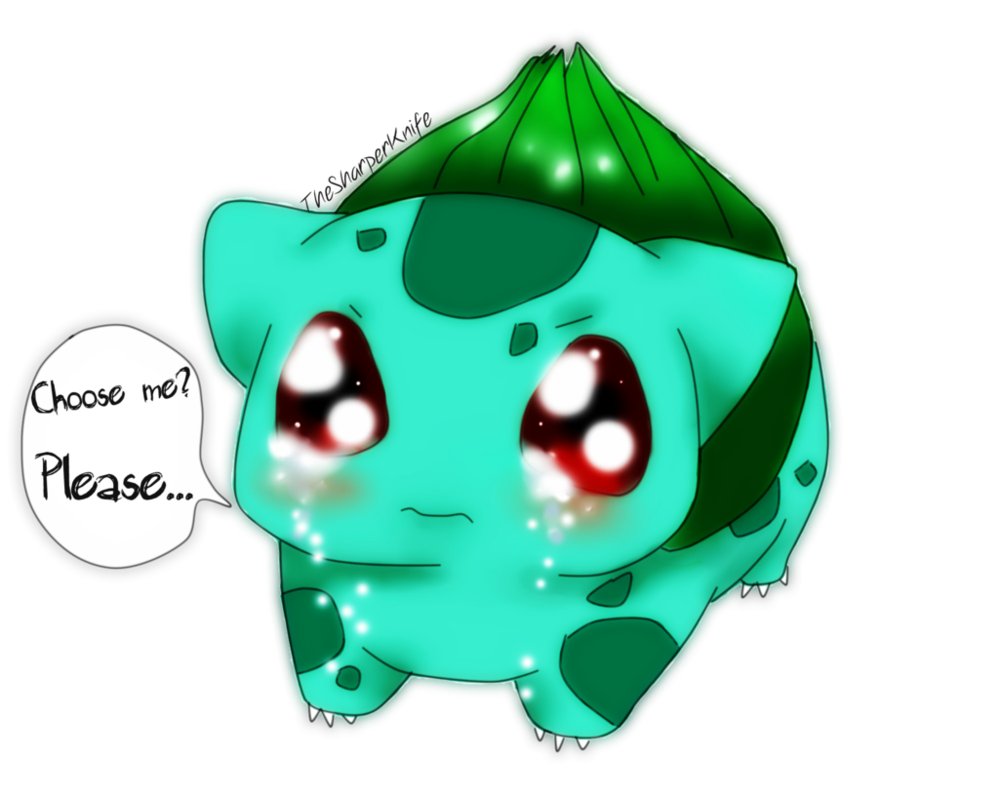

In [19]:
# Find information about the Pokemon photos 
%matplotlib inline

path = os.path.join("pokemon", "bulbasaur")

# Get Bulbasaur filename photos into a list
path_list = os.listdir(path)

# Count number of Photos under bulbasaur sub-folder
bulbasaur_images = len(path_list)
print(bulbasaur_images)

randSelect = random.randint(0, bulbasaur_images)

img_display = path_list[randSelect]
# print(img_display)

# Display Image

Image.open(os.path.join(path, img_display))

Image.show()

#### Separate Different Pokemon Classes by Training, Validation, Testing Split(s)

I have used a Python Library called Split-Folders, to be able to perform Train/Validate/Test split. 

In [22]:
# Create a copy of the original pokemon directory and contents into Train/Validate/Splits randomly
# Train/Validate/Test split is 70%/20%/10% respectively
# This metthod works as all classes have equal number of samples

# Only run below step if the Train/Validate/Test split has not been created
splitfolders.ratio("pokemon", 
                    output="pokemon_split",
                    seed = 42,
                    ratio = (.7, .2, .1),
                )

##### Due to small sample size, use Keras' Image Data Generator to perform Data Augmentation on Training Data. Validation and Testing data will not be augmented.

In [2]:
# Create an Image data generator for Train and Validation Split

datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images between 0 - 180 degrees (10 degrees set)
    zoom_range=0.1,  # Randomly zoom 10% of the image(s)
    width_shift_range=0.1,  # randomly shift images horizontally (percentage of total width)
    height_shift_range=0.1,  # randomly shift images vertically (percentage of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False, # Set as False as we are not expecting upside-down photos of the Pokemon(s)
    rescale = 1./255 # Normalise the RGB values 
)  

# No need to augment validation data
datagen_valid = ImageDataGenerator(samplewise_center=True)

# No need to augment Testing Data
datagen_test = ImageDataGenerator(samplewise_center=True)

#### Convert Photo into an Array

In [3]:
# Check if OS is either Windows and Linux and Use the appropriate path
# Please change the pathname(s) accordingly

if os.name == 'nt':
    train_dir = r"C:\Users\Jeddisson\Dropbox\RP-NVIDIA Programme Notes\Deep Learning\Assignment\pokemon_split\train"
    valid_dir = r"C:\Users\Jeddisson\Dropbox\RP-NVIDIA Programme Notes\Deep Learning\Assignment\pokemon_split\val"
    test_dir = r"C:\Users\Jeddisson\Dropbox\RP-NVIDIA Programme Notes\Deep Learning\Assignment\pokemon_split\test"
else:
    train_dir = "/home/stud22002713/DeepLearning/pokemon_split/train"
    valid_dir = "/home/stud22002713/DeepLearning/pokemon_split/val"
    test_dir = "/home/stud22002713/DeepLearning/pokemon_split/test"

In [4]:
print(train_dir)
print(valid_dir)
print(test_dir)

/home/stud22002713/DeepLearning/pokemon_split/train
/home/stud22002713/DeepLearning/pokemon_split/val
/home/stud22002713/DeepLearning/pokemon_split/test


In [4]:
# load and iterate training dataset
# Specifiy the target size for the Neural Network input layer
# Class mode specifies the type of classes. For our case, we have 5 classes, hence 'categorical'

# Due to small training data, adjust batch size to 8

train_it = datagen_train.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=8,
)

# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=8,
)

test_it = datagen_test.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=8,
)

Found 175 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [5]:
# Check the Array Shape of Training, Validation and Testing Data

print("Training Data Shape: {}".format(train_it.image_shape))
print("Validation Data Shape: {}".format(valid_it.image_shape))
print("Testing Data Shape: {}".format(test_it.image_shape))

Training Data Shape: (224, 224, 3)
Validation Data Shape: (224, 224, 3)
Testing Data Shape: (224, 224, 3)


## Import Pre-Trained Model and Model Training

In [6]:
# Import steps
from tensorflow import keras
from tensorflow.keras.applications import vgg16
from tensorflow.keras import models, layers, optimizers, losses, metrics

In [8]:
# Import VGG16 Model with ImageNet Weights, specifying the input shape that is the same shape with earlier step
base_model = vgg16.VGG16(weights='imagenet',
                        include_top=False,
                        input_shape= (224, 224, 3)
                        )

2022-04-19 21:08:13.535195: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-04-19 21:08:13.580920: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2245890000 Hz
2022-04-19 21:08:13.605368: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x559581c26f70 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-04-19 21:08:13.605458: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-04-19 21:08:13.605682: I tensorflow/core/common_runtime/process_util.cc:147] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
# Freeze weights on the base model
base_model.trainable = False

# Check that model has been imported correctly, as per earlier parameters
# Due to VGG16 Model freezing, trainable parameters should be 0 below
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
# Attach Dense Layers into the model
model = keras.models.Sequential(base_model.layers)

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

# Check if top layers have been built correct
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

## RMSProp Model Compilation and Training 

In [11]:
model.compile(optimizer=keras.optimizers.RMSprop(),
                loss= keras.losses.CategoricalCrossentropy(),
                metrics= [keras.metrics.CategoricalAccuracy()]
)

In [12]:
history = model.fit(train_it, 
                    validation_data= valid_it,
                    epochs = 60
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 22 steps, validate for 7 steps
Epoch 1/60
12/22 [===============>..............] - ETA: 6s - loss: 14.2202 - categorical_accuracy: 0.2083

/home/stud22002713/python/envs/DL/lib/python3.7/site-packages/PIL/Image.py:946: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


22/22 [==============================] - 19s 858ms/step - loss: 8.7035 - categorical_accuracy: 0.2571 - val_loss: 12.3056 - val_categorical_accuracy: 0.4200
Epoch 2/60
22/22 [==============================] - 18s 805ms/step - loss: 1.9070 - categorical_accuracy: 0.4171 - val_loss: 4.6338 - val_categorical_accuracy: 0.7000
Epoch 3/60
22/22 [==============================] - 15s 667ms/step - loss: 1.2883 - categorical_accuracy: 0.5771 - val_loss: 5.0251 - val_categorical_accuracy: 0.7400
Epoch 4/60
22/22 [==============================] - 16s 734ms/step - loss: 0.8736 - categorical_accuracy: 0.6800 - val_loss: 4.9516 - val_categorical_accuracy: 0.7600
Epoch 5/60
22/22 [==============================] - 16s 720ms/step - loss: 0.7182 - categorical_accuracy: 0.7829 - val_loss: 8.7825 - val_categorical_accuracy: 0.7200
Epoch 6/60
22/22 [==============================] - 16s 732ms/step - loss: 0.7151 - categorical_accuracy: 0.7829 - val_loss: 14.0805 - val_categorical_accuracy: 0.7200
Epoch 7

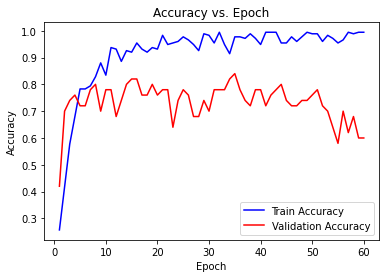

In [13]:
# Plot Training Accuracy vs Validation Accuracy
%matplotlib inline

def Accuracy_plotter(history):
    train_acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    epoch = list(range(1, len(val_acc) + 1))
    plt.plot(epoch, train_acc, color='blue', label='Train Accuracy')
    plt.plot(epoch, val_acc, color='red', label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
#     plt.ylim(0,1)
    plt.title('Accuracy vs. Epoch')
    plt.legend()
    plt.show()

Accuracy_plotter(history)

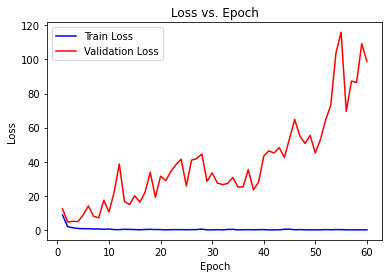

In [14]:
def Loss_plotter(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epoch = list(range(1, len(val_loss) + 1))
    plt.plot(epoch, train_loss, color='blue', label='Train Loss')
    plt.plot(epoch, val_loss, color='red', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
#     plt.ylim(0,10)
    plt.title('Loss vs. Epoch')
    plt.legend()
    plt.show()

Loss_plotter(history)

In [15]:
# Model evaluation for the Untrainable/Frozen VGG16 model
loss, acc = model.evaluate(test_it, verbose=0)

print('Test loss: {:.4f}'.format(loss))
print('Test accuracy: {:.4f}'.format(acc))

  ...
    to  
  ['...']
Test loss: 96.3669
Test accuracy: 0.6000


###### Make VGG16 Model Trainable, allowing Weights/Biases to be adjusted

In [16]:
base_model.trainable = True
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [17]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = 0.00001),
                loss= keras.losses.CategoricalCrossentropy(),
                metrics= [keras.metrics.CategoricalAccuracy()]
)

In [18]:
history_1 = model.fit(train_it, 
                    validation_data= valid_it,
                    epochs = 60
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 22 steps, validate for 7 steps
Epoch 1/60
 2/22 [=>............................] - ETA: 1:04 - loss: 0.0114 - categorical_accuracy: 1.0000    

/home/stud22002713/python/envs/DL/lib/python3.7/site-packages/PIL/Image.py:946: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


22/22 [==============================] - 44s 2s/step - loss: 0.0399 - categorical_accuracy: 0.9829 - val_loss: 120.1238 - val_categorical_accuracy: 0.6800
Epoch 2/60
22/22 [==============================] - 45s 2s/step - loss: 0.0182 - categorical_accuracy: 0.9943 - val_loss: 112.8823 - val_categorical_accuracy: 0.6200
Epoch 3/60
22/22 [==============================] - 44s 2s/step - loss: 0.1161 - categorical_accuracy: 0.9886 - val_loss: 96.4391 - val_categorical_accuracy: 0.6200
Epoch 4/60
22/22 [==============================] - 39s 2s/step - loss: 0.0429 - categorical_accuracy: 0.9886 - val_loss: 88.1971 - val_categorical_accuracy: 0.6000
Epoch 5/60
22/22 [==============================] - 40s 2s/step - loss: 0.0234 - categorical_accuracy: 0.9943 - val_loss: 81.3701 - val_categorical_accuracy: 0.6000
Epoch 6/60
22/22 [==============================] - 39s 2s/step - loss: 0.0236 - categorical_accuracy: 0.9886 - val_loss: 89.2831 - val_categorical_accuracy: 0.6400
Epoch 7/60
22/22 [=

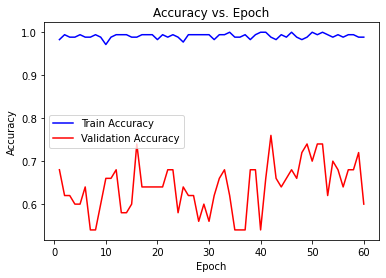

In [19]:
# Plot Training Accuracy vs Validation Accuracy
Accuracy_plotter(history_1)

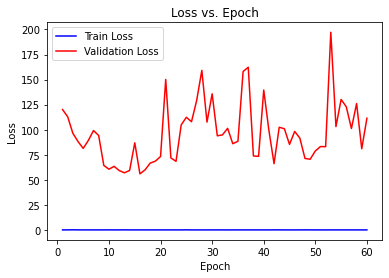

In [20]:
Loss_plotter(history_1)

In [21]:
# Model Evaluation for the Trainable/Unfrozen model
loss, acc = model.evaluate(test_it, verbose=0)

print('Test loss: {:.4f}'.format(loss))
print('Test accuracy: {:.4f}'.format(acc))

  ...
    to  
  ['...']
Test loss: 216.3453
Test accuracy: 0.5600


### Using Stochastic Gradient Descent Optimizer 

In this section, I will re-use the same model architecture, but changing the optimizer to Stoschastic Gradient Descent (SGD)

In [22]:
# Reset the VGG16 Model and use another Optimizer 

SGD_model = vgg16.VGG16(weights='imagenet',
                        include_top=False,
                        input_shape= (224, 224, 3)
                        )

In [23]:
# Freeze weights on the base model
SGD_model.trainable = False

# Check that model has been imported correctly, as per earlier parameters
# Due to VGG16 Model freezing, trainable parameters should be 0 below
SGD_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
# Use the same architecture as per earlier model. 
# Attach Dense Layers into the model
model_SGD = keras.models.Sequential(SGD_model.layers)

model_SGD.add(layers.Flatten())
model_SGD.add(layers.Dense(512, activation='relu'))
model_SGD.add(layers.Dense(512, activation='relu'))
model_SGD.add(layers.Dense(5, activation='softmax'))

# Check if top layers have been built correct
model_SGD.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [25]:
model_SGD.compile(optimizer=keras.optimizers.SGD(),
                loss= keras.losses.CategoricalCrossentropy(),
                metrics= [keras.metrics.CategoricalAccuracy()]
)

history_SGD = model_SGD.fit(train_it, 
                    validation_data= valid_it,
                    epochs = 60
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 22 steps, validate for 7 steps
Epoch 1/60
 8/22 [=========>....................] - ETA: 9s - loss: 2.5719 - categorical_accuracy: 0.2188 

/home/stud22002713/python/envs/DL/lib/python3.7/site-packages/PIL/Image.py:946: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


22/22 [==============================] - 17s 791ms/step - loss: 2.0494 - categorical_accuracy: 0.2114 - val_loss: 4.9730 - val_categorical_accuracy: 0.3400
Epoch 2/60
22/22 [==============================] - 16s 738ms/step - loss: 1.6012 - categorical_accuracy: 0.2457 - val_loss: 4.4631 - val_categorical_accuracy: 0.2800
Epoch 3/60
22/22 [==============================] - 16s 711ms/step - loss: 1.5841 - categorical_accuracy: 0.3143 - val_loss: 2.9181 - val_categorical_accuracy: 0.4600
Epoch 4/60
22/22 [==============================] - 15s 687ms/step - loss: 1.4646 - categorical_accuracy: 0.3714 - val_loss: 3.2316 - val_categorical_accuracy: 0.5000
Epoch 5/60
22/22 [==============================] - 16s 714ms/step - loss: 1.3203 - categorical_accuracy: 0.4857 - val_loss: 4.0068 - val_categorical_accuracy: 0.5800
Epoch 6/60
22/22 [==============================] - 16s 731ms/step - loss: 1.2869 - categorical_accuracy: 0.4343 - val_loss: 2.8850 - val_categorical_accuracy: 0.7000
Epoch 7/6

Epoch 50/60
22/22 [==============================] - 15s 678ms/step - loss: 0.0677 - categorical_accuracy: 0.9886 - val_loss: 15.5025 - val_categorical_accuracy: 0.7800
Epoch 51/60
22/22 [==============================] - 15s 691ms/step - loss: 0.0658 - categorical_accuracy: 0.9829 - val_loss: 17.8899 - val_categorical_accuracy: 0.7600
Epoch 52/60
22/22 [==============================] - 15s 689ms/step - loss: 0.1053 - categorical_accuracy: 0.9600 - val_loss: 16.9729 - val_categorical_accuracy: 0.7600
Epoch 53/60
22/22 [==============================] - 15s 672ms/step - loss: 0.2155 - categorical_accuracy: 0.9486 - val_loss: 18.9061 - val_categorical_accuracy: 0.7800
Epoch 54/60
22/22 [==============================] - 16s 727ms/step - loss: 0.2996 - categorical_accuracy: 0.9200 - val_loss: 17.9437 - val_categorical_accuracy: 0.8000
Epoch 55/60
22/22 [==============================] - 15s 679ms/step - loss: 0.0868 - categorical_accuracy: 0.9771 - val_loss: 17.4017 - val_categorical_acc

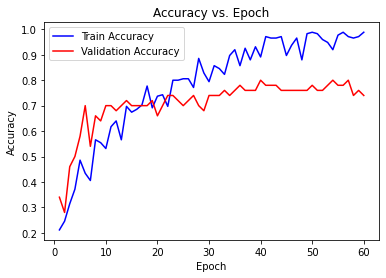

In [26]:
# Plot Training Accuracy vs Validation Accuracy
Accuracy_plotter(history_SGD)

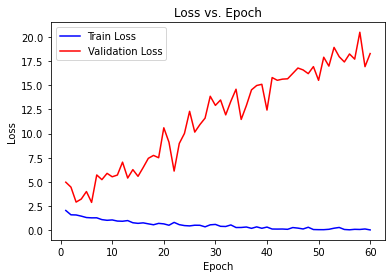

In [27]:
Loss_plotter(history_SGD)

In [28]:
# Model Evaluation on the Untrainable/Frozen Model 
loss, acc = model_SGD.evaluate(test_it, verbose=0)

print('Test loss: {:.4f}'.format(loss))
print('Test accuracy: {:.4f}'.format(acc))

  ...
    to  
  ['...']
Test loss: 13.5802
Test accuracy: 0.6800


In [29]:
# Unfreeze SGD Model and check Number of Parameters
model_SGD.Trainable = True

model_SGD.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [30]:
# Set a low learning rate
model_SGD.compile(optimizer=keras.optimizers.SGD(lr=0.00001),
                loss= keras.losses.CategoricalCrossentropy(),
                metrics= [keras.metrics.CategoricalAccuracy()]
                 )

In [31]:
# Train the Model using SGD optimizer
history_SGD = model_SGD.fit(train_it, 
                    validation_data= valid_it,
                    epochs = 60
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 22 steps, validate for 7 steps
Epoch 1/60
15/22 [===================>..........] - ETA: 3s - loss: 0.0882 - categorical_accuracy: 0.9583

/home/stud22002713/python/envs/DL/lib/python3.7/site-packages/PIL/Image.py:946: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


22/22 [==============================] - 15s 702ms/step - loss: 0.0849 - categorical_accuracy: 0.9657 - val_loss: 18.2567 - val_categorical_accuracy: 0.7400
Epoch 2/60
22/22 [==============================] - 15s 681ms/step - loss: 0.0831 - categorical_accuracy: 0.9714 - val_loss: 18.2518 - val_categorical_accuracy: 0.7400
Epoch 3/60
22/22 [==============================] - 15s 682ms/step - loss: 0.0540 - categorical_accuracy: 0.9829 - val_loss: 18.2413 - val_categorical_accuracy: 0.7400
Epoch 4/60
22/22 [==============================] - 15s 685ms/step - loss: 0.0578 - categorical_accuracy: 0.9829 - val_loss: 18.2333 - val_categorical_accuracy: 0.7400
Epoch 5/60
22/22 [==============================] - 16s 711ms/step - loss: 0.0748 - categorical_accuracy: 0.9771 - val_loss: 18.2240 - val_categorical_accuracy: 0.7400
Epoch 6/60
22/22 [==============================] - 15s 662ms/step - loss: 0.0655 - categorical_accuracy: 0.9714 - val_loss: 18.2128 - val_categorical_accuracy: 0.7400
Epo

In [32]:
# Model Evaluation for the Trainable/unfrozen model
loss, acc = model_SGD.evaluate(test_it, verbose=0)

print('Test loss: {:.4f}'.format(loss))
print('Test accuracy: {:.4f}'.format(acc))

  ...
    to  
  ['...']
Test loss: 12.8695
Test accuracy: 0.7200


### Using Adam Optimizer

In this section, I will be using Adam Optimizer for both non-trainable and trainable VGG16 model

In [9]:
Adam_model = vgg16.VGG16(weights='imagenet',
                        include_top=False,
                        input_shape= (224, 224, 3)
                        )

ERROR! Session/line number was not unique in database. History logging moved to new session 54


In [10]:
# Freeze weights on the base model
Adam_model.trainable = False

# Check that model has been imported correctly, as per earlier parameters
# Due to VGG16 Model freezing, trainable parameters should be 0 below
Adam_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
# Attach Dense Layers into the model
model_Adam = keras.models.Sequential(Adam_model.layers)

model_Adam.add(layers.Flatten())
model_Adam.add(layers.Dense(512, activation='relu'))
model_Adam.add(layers.Dense(512, activation='relu'))
model_Adam.add(layers.Dense(5, activation='softmax'))

# Check if top layers have been built correct
model_Adam.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [12]:
model_Adam.compile(optimizer=keras.optimizers.Adam(),
                loss= keras.losses.CategoricalCrossentropy(),
                metrics= [keras.metrics.CategoricalAccuracy()]
)

history_Adam = model_Adam.fit(train_it, 
                    validation_data= valid_it,
                    epochs = 60
                    )

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 22 steps, validate for 7 steps
Epoch 1/60
 7/22 [========>.....................] - ETA: 15s - loss: 5.5590 - categorical_accuracy: 0.1964

/home/stud22002713/python/envs/DL/lib/python3.7/site-packages/PIL/Image.py:946: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


22/22 [==============================] - 29s 1s/step - loss: 3.1273 - categorical_accuracy: 0.3371 - val_loss: 9.5796 - val_categorical_accuracy: 0.5000
Epoch 2/60
22/22 [==============================] - 30s 1s/step - loss: 0.7784 - categorical_accuracy: 0.6686 - val_loss: 4.9097 - val_categorical_accuracy: 0.6400
Epoch 3/60
22/22 [==============================] - 21s 961ms/step - loss: 0.4635 - categorical_accuracy: 0.8171 - val_loss: 9.8118 - val_categorical_accuracy: 0.7400
Epoch 4/60
22/22 [==============================] - 21s 937ms/step - loss: 0.3621 - categorical_accuracy: 0.8686 - val_loss: 10.9990 - val_categorical_accuracy: 0.7200
Epoch 5/60
22/22 [==============================] - 22s 1s/step - loss: 0.2738 - categorical_accuracy: 0.8971 - val_loss: 8.6473 - val_categorical_accuracy: 0.8200
Epoch 6/60
22/22 [==============================] - 20s 915ms/step - loss: 0.2552 - categorical_accuracy: 0.9143 - val_loss: 16.5824 - val_categorical_accuracy: 0.6400
Epoch 7/60
22/22

Epoch 50/60
22/22 [==============================] - 13s 605ms/step - loss: 0.2391 - categorical_accuracy: 0.9200 - val_loss: 77.4390 - val_categorical_accuracy: 0.6600
Epoch 51/60
22/22 [==============================] - 15s 659ms/step - loss: 0.1857 - categorical_accuracy: 0.9714 - val_loss: 53.3078 - val_categorical_accuracy: 0.7400
Epoch 52/60
22/22 [==============================] - 14s 629ms/step - loss: 0.0569 - categorical_accuracy: 0.9829 - val_loss: 50.1318 - val_categorical_accuracy: 0.7600
Epoch 53/60
22/22 [==============================] - 14s 634ms/step - loss: 0.2843 - categorical_accuracy: 0.9429 - val_loss: 36.2580 - val_categorical_accuracy: 0.8000
Epoch 54/60
22/22 [==============================] - 14s 630ms/step - loss: 0.0438 - categorical_accuracy: 0.9943 - val_loss: 29.0032 - val_categorical_accuracy: 0.8200
Epoch 55/60
22/22 [==============================] - 15s 662ms/step - loss: 0.0538 - categorical_accuracy: 0.9771 - val_loss: 35.4221 - val_categorical_acc

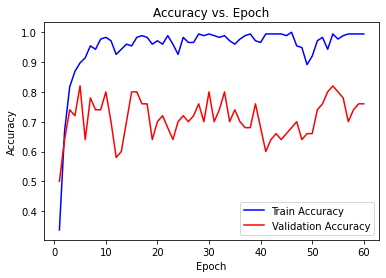

In [14]:
# Plot Training Accuracy vs Validation Accuracy
Accuracy_plotter(history_Adam)

ERROR! Session/line number was not unique in database. History logging moved to new session 59


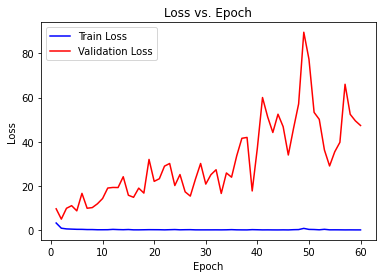

In [15]:
Loss_plotter(history_Adam)

In [13]:
# Model Evaluation on the frozen model
loss, acc = model_Adam.evaluate(test_it, verbose=0)

print('Test loss: {:.4f}'.format(loss))
print('Test accuracy: {:.4f}'.format(acc))

ERROR! Session/line number was not unique in database. History logging moved to new session 58
  ...
    to  
  ['...']


  ...
    to  
  ['...']


Test loss: 51.4906
Test accuracy: 0.6000


In [18]:
# Unfreeze Model with Adam Optimizer
# Unfreeze the VGG16 model, then re-attach the Dense Layers + Output layers

Adam_model.trainable = True
Adam_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
# Attach Dense Layers into the model
model_Adam = keras.models.Sequential(Adam_model.layers)

model_Adam.add(layers.Flatten())
model_Adam.add(layers.Dense(512, activation='relu'))
model_Adam.add(layers.Dense(512, activation='relu'))
model_Adam.add(layers.Dense(5, activation='softmax'))

# Check if top layers have been built correct
model_Adam.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [23]:
model_Adam.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.00001),
                loss= keras.losses.CategoricalCrossentropy(),
                metrics= [keras.metrics.CategoricalAccuracy()]
)

history_Adam = model_Adam.fit(train_it, 
                    validation_data= valid_it,
                    epochs = 60
                    )

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 22 steps, validate for 7 steps
Epoch 1/60


/home/stud22002713/python/envs/DL/lib/python3.7/site-packages/PIL/Image.py:946: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


22/22 [==============================] - 42s 2s/step - loss: 0.3498 - categorical_accuracy: 0.8914 - val_loss: 39.0698 - val_categorical_accuracy: 0.5400
Epoch 2/60
22/22 [==============================] - 42s 2s/step - loss: 0.2253 - categorical_accuracy: 0.9371 - val_loss: 25.7560 - val_categorical_accuracy: 0.7000
Epoch 3/60
22/22 [==============================] - 38s 2s/step - loss: 0.1097 - categorical_accuracy: 0.9600 - val_loss: 43.9809 - val_categorical_accuracy: 0.6000
Epoch 4/60
22/22 [==============================] - 37s 2s/step - loss: 0.1010 - categorical_accuracy: 0.9886 - val_loss: 28.4109 - val_categorical_accuracy: 0.7400
Epoch 5/60
22/22 [==============================] - 36s 2s/step - loss: 0.0540 - categorical_accuracy: 0.9886 - val_loss: 30.6785 - val_categorical_accuracy: 0.7400
Epoch 6/60
22/22 [==============================] - 37s 2s/step - loss: 0.0615 - categorical_accuracy: 0.9771 - val_loss: 44.4032 - val_categorical_accuracy: 0.6600
Epoch 7/60
22/22 [===

22/22 [==============================] - 36s 2s/step - loss: 0.0254 - categorical_accuracy: 0.9943 - val_loss: 34.8582 - val_categorical_accuracy: 0.7000
Epoch 51/60
22/22 [==============================] - 37s 2s/step - loss: 0.0162 - categorical_accuracy: 0.9943 - val_loss: 34.5912 - val_categorical_accuracy: 0.7800
Epoch 52/60
22/22 [==============================] - 39s 2s/step - loss: 0.0475 - categorical_accuracy: 0.9714 - val_loss: 47.9064 - val_categorical_accuracy: 0.7200
Epoch 53/60
22/22 [==============================] - 35s 2s/step - loss: 0.0367 - categorical_accuracy: 0.9943 - val_loss: 39.8311 - val_categorical_accuracy: 0.7200
Epoch 54/60
22/22 [==============================] - 36s 2s/step - loss: 0.0612 - categorical_accuracy: 0.9771 - val_loss: 53.5487 - val_categorical_accuracy: 0.6400
Epoch 55/60
22/22 [==============================] - 37s 2s/step - loss: 0.0364 - categorical_accuracy: 0.9829 - val_loss: 27.2432 - val_categorical_accuracy: 0.7000
Epoch 56/60
22/2

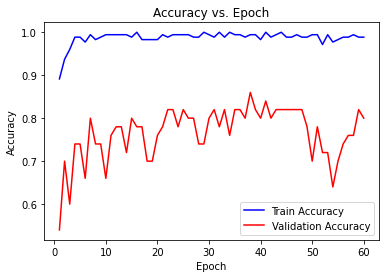

In [24]:
# Plot Training Accuracy vs Validation Accuracy
Accuracy_plotter(history_Adam)

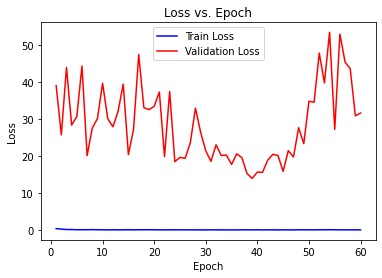

In [25]:
Loss_plotter(history_Adam)

In [26]:
loss, acc = model_Adam.evaluate(test_it, verbose=0)

print('Test loss: {:.4f}'.format(loss))
print('Test accuracy: {:.4f}'.format(acc))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Test loss: 15.6202
Test accuracy: 0.8400
